In [15]:
# import the necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import joblib

In [16]:
# load the dataset
data = pd.read_csv('admit_data4.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [17]:
# Define the input and output data
X = data.iloc[:, 1:8].values # select columns 1-7 with all rows
y = data.iloc[:, 8].values # select 8th column

In [18]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# create the random forest regressor object
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

In [20]:
# train the model using the training sets
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [21]:
# make predictions on the testing set
y_pred = model.predict(X_test)
y_pred

array([0.64513451, 0.7215858 , 0.94283738, 0.8237992 , 0.56208391,
       0.9217133 , 0.56035796, 0.47752309, 0.67837699, 0.90572697,
       0.72588124, 0.94137224, 0.52951736, 0.90345295, 0.70588904,
       0.67499489, 0.68321829, 0.49360788, 0.70229423, 0.95828327,
       0.62348117, 0.67926382, 0.71840292, 0.55493482, 0.94378559,
       0.80029451, 0.70689277, 0.57077372, 0.686235  , 0.8006901 ,
       0.80290959, 0.94464597, 0.64903348, 0.46512167, 0.68379354,
       0.68070389, 0.72037166, 0.67492485, 0.634741  , 0.92174033,
       0.74273572, 0.6409308 , 0.75544526, 0.94638819, 0.8764731 ,
       0.8359301 , 0.96005531, 0.66864958, 0.9381826 , 0.89095047,
       0.91063404, 0.71854296, 0.76547125, 0.94336166, 0.57184165,
       0.58620717, 0.68661485, 0.83753149, 0.5882183 , 0.86546682,
       0.66711249, 0.66234366, 0.67749461, 0.47112871, 0.66200035,
       0.68744404, 0.61362255, 0.83909559, 0.88432146, 0.77696843,
       0.70565144, 0.82405462, 0.92010758, 0.8587758 , 0.55164

In [22]:
# calculate R-squared
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8141845501249184


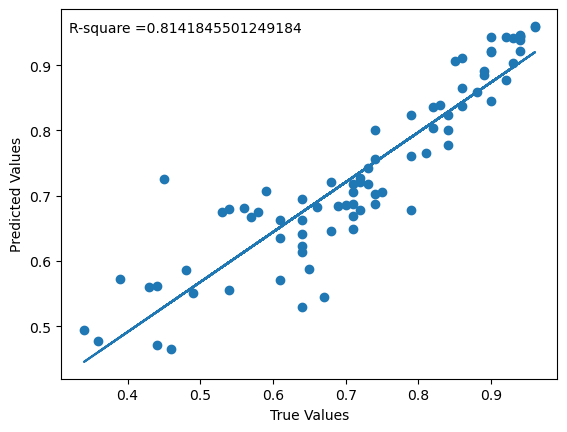

In [23]:
a, b = np.polyfit(y_test, y_pred, 1)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot(y_test, a*y_test+b)
plt.text(0.32, 0.95, 'R-square =' + str(accuracy))

plt.show()

In [24]:
# predict Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.004798379139551531


In [25]:
# predict Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.04767701824856282


In [26]:
# predict Root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 0.06927033376238007


In [27]:
# function for precision at k
def precision_at_k(y_test, y_pred, k):

    # sort the prediction values by probability in descending order
    sorted_pred_values = np.argsort(y_pred)[::-1] 

    # select the top k sorted prediction values
    top_k_sorted_pred_values = sorted_pred_values[:k]

    # precision at k
    true_positives = np.sum(y_test[top_k_sorted_pred_values])
    precision_at_k = true_positives / k

    return precision_at_k

# precision at k=5
precision_at_5 = precision_at_k(y_test, y_pred, k=5)
print("precision_at_k=5: ", precision_at_5)

precision_at_k=5:  0.944


In [28]:
# save model to disk
joblib.dump(model, "model.pkl")

['model.pkl']